In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import numpy as np
import itertools
import time
import math
import csv

In [2]:
import CMGDB

First we run the code using a map defined in the C++ code. In this example
the map is the Leslie map. First we define parameters for the code.

In [3]:
subdiv_min = 20 # Min number of subdivision of phase space
subdiv_max = 30 # Max number of subdivision of phase space
lower_bounds = [-0.001, -0.001] # Lower bounds of the bounding box in phase space
upper_bounds = [90.0, 70.0] # Upper bounds of the bounding box in phase space
params = [19.6, 23.68] # Parameter for Leslie map

morse_fname = 'morse.csv' # File name to save Morse sets

Next we run the code using to compute the Morse sets using the parameter defined above.

In [4]:
%%time
morse_graph = CMGDB.MorseGraphIntvalMap(subdiv_min, subdiv_max, lower_bounds,
                                        upper_bounds, params, morse_fname)

CPU times: user 3.25 s, sys: 336 ms, total: 3.59 s
Wall time: 3.61 s


Plot the Morse graph.

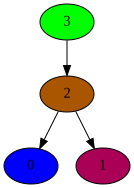

In [5]:
CMGDB.PlotMorseGraph(morse_graph)

The Morse sets are saved in the file specified above. Load this file and plot the Morse sets.

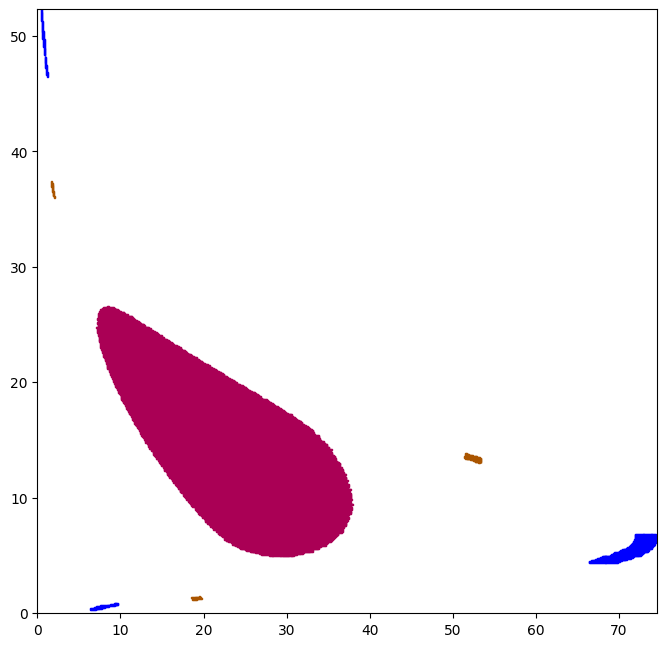

In [6]:
morse_sets = CMGDB.LoadMorseSetFile(morse_fname)

CMGDB.PlotMorseSets(morse_sets)

In the next example we run the code again with the Leslie map, but this time we define
the map as a Python function and pass that function to the C++ code.

In [7]:
# Leslie map withou padding

def f(x):
    th1 = 19.6
    th2 = 23.68
    return [(th1 * x[0] + th2 * x[1]) * math.exp (-0.1 * (x[0] + x[1])), 0.7 * x[0]]

def F(rect):
    x0_min = rect[0]
    x1_min = rect[1]
    x0_max = rect[2]
    x1_max = rect[3]
    y1 = f([x0_min, x1_min])
    y2 = f([x0_max, x1_min])
    y3 = f([x0_min, x1_max])
    y4 = f([x0_max, x1_max])
    y0_min = min([y1[0], y2[0], y3[0], y4[0]])
    y0_max = max([y1[0], y2[0], y3[0], y4[0]])
    y1_min = min([y1[1], y2[1], y3[1], y4[1]])
    y1_max = max([y1[1], y2[1], y3[1], y4[1]])
    return [y0_min, y1_min, y0_max, y1_max]

In [8]:
# Define de parameters for this map
subdiv_min = 20
subdiv_max = 30
lower_bounds = [-0.001, -0.001]
upper_bounds = [90.0, 70.0]

morse_fname = 'morse.csv'

In [9]:
%%time
morse_graph = CMGDB.MorseGraphMap(subdiv_min, subdiv_max, lower_bounds,
                                  upper_bounds, morse_fname, F)

CPU times: user 3.68 s, sys: 296 ms, total: 3.97 s
Wall time: 4.07 s


We can select a colormap to plot the Morse graph and the Morse sets. It is important to select the same colormap for the Morse graph and the Morse sets so they have matching colors.

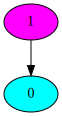

In [10]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

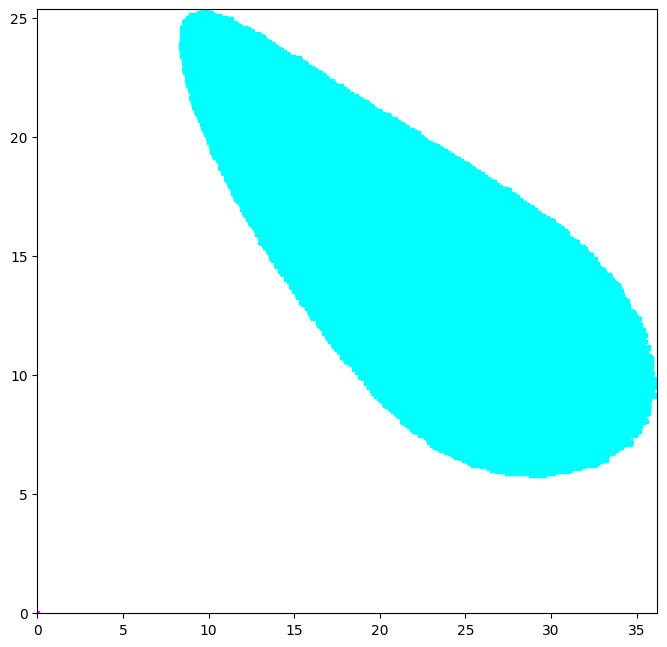

In [11]:
# We can just pass the file name to plot the Morse sets
CMGDB.PlotMorseSets(morse_fname, cmap=matplotlib.cm.cool)

In [12]:
# Leslie map with padding

def f(x):
    th1 = 19.6
    th2 = 23.68
    return [(th1 * x[0] + th2 * x[1]) * math.exp (-0.1 * (x[0] + x[1])), 0.7 * x[0]]

def F(rect):
    x0_min = rect[0]
    x1_min = rect[1]
    x0_max = rect[2]
    x1_max = rect[3]
    h_x0 = x0_max - x0_min
    h_x1 = x1_max - x1_min
    y1 = f([x0_min, x1_min])
    y2 = f([x0_max, x1_min])
    y3 = f([x0_min, x1_max])
    y4 = f([x0_max, x1_max])
    y0_min = min([y1[0], y2[0], y3[0], y4[0]]) - h_x0
    y0_max = max([y1[0], y2[0], y3[0], y4[0]]) + h_x0
    y1_min = min([y1[1], y2[1], y3[1], y4[1]]) - h_x1
    y1_max = max([y1[1], y2[1], y3[1], y4[1]]) + h_x1
    return [y0_min, y1_min, y0_max, y1_max]

In [13]:
# Define de parameters for this map
subdiv_min = 20
subdiv_max = 30
lower_bounds = [-0.001, -0.001]
upper_bounds = [90.0, 70.0]

morse_fname = 'morse_2.csv'

In [14]:
%%time
morse_graph = CMGDB.MorseGraphMap(subdiv_min, subdiv_max, lower_bounds,
                                  upper_bounds, morse_fname, F)

CPU times: user 8.78 s, sys: 413 ms, total: 9.2 s
Wall time: 9.76 s


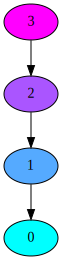

In [15]:
CMGDB.PlotMorseGraph(morse_graph, cmap=matplotlib.cm.cool)

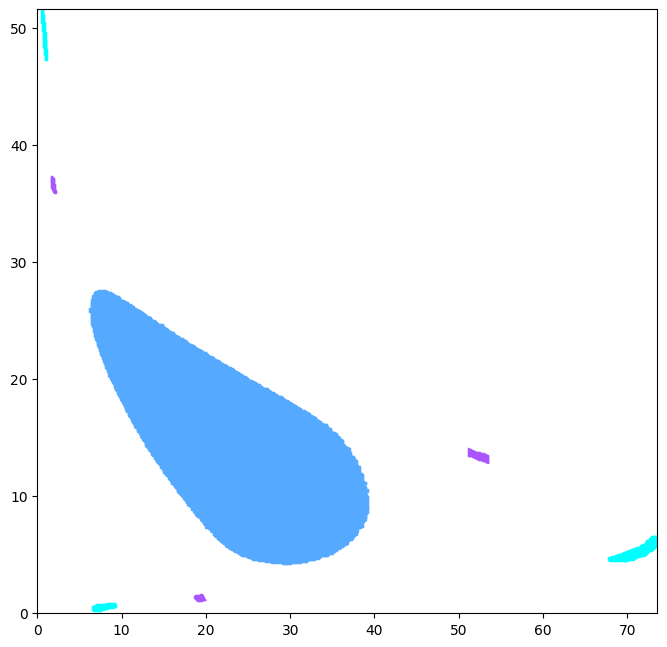

In [16]:
CMGDB.PlotMorseSets(morse_fname, cmap=matplotlib.cm.cool)